# ИУ5Ц-81Б Печуркин Д.С. НИРС

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
colors = ['#9933FF','#FDD20E']

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Пропущенных значений нет

In [6]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Возраст: возраст пациента [кол-во лет]  
Пол: пол пациента [M: Мужчина, F: Женщина]  
ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]  
RestingBP: артериальное давление в состоянии покоя [мм рт. ст.]  
Холестерин: холестерин сыворотки [мм/дл]  
FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]  
ЭКГ покоя: результаты электрокардиограммы покоя [Нормальный: нормальный, ST: наличие аномалий ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), ГЛЖ: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]  
MaxHR: достигнутая максимальная частота пульса [числовое значение от 60 до 202]  
Стенокардия при физической нагрузке: стенокардия, вызванная физической нагрузкой [Д: Да, Н: Нет]  
Oldpeak: oldpeak = ST [Числовое значение, измеренное при депрессии]  
ST_Slope: наклон пикового сегмента ST при нагрузке [Up, Flat]  
HeartDisease: выходной класс [1: заболевание сердца, 0: нормальное]  

In [7]:
string_col = data.select_dtypes(include="object").columns
data[string_col]=data[string_col].astype("string")

In [8]:
data.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [9]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


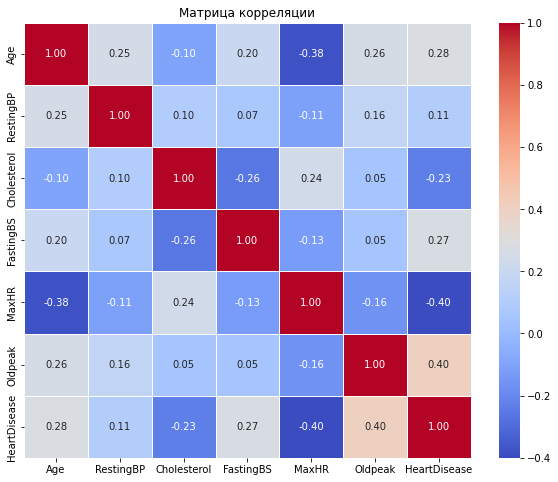

In [11]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

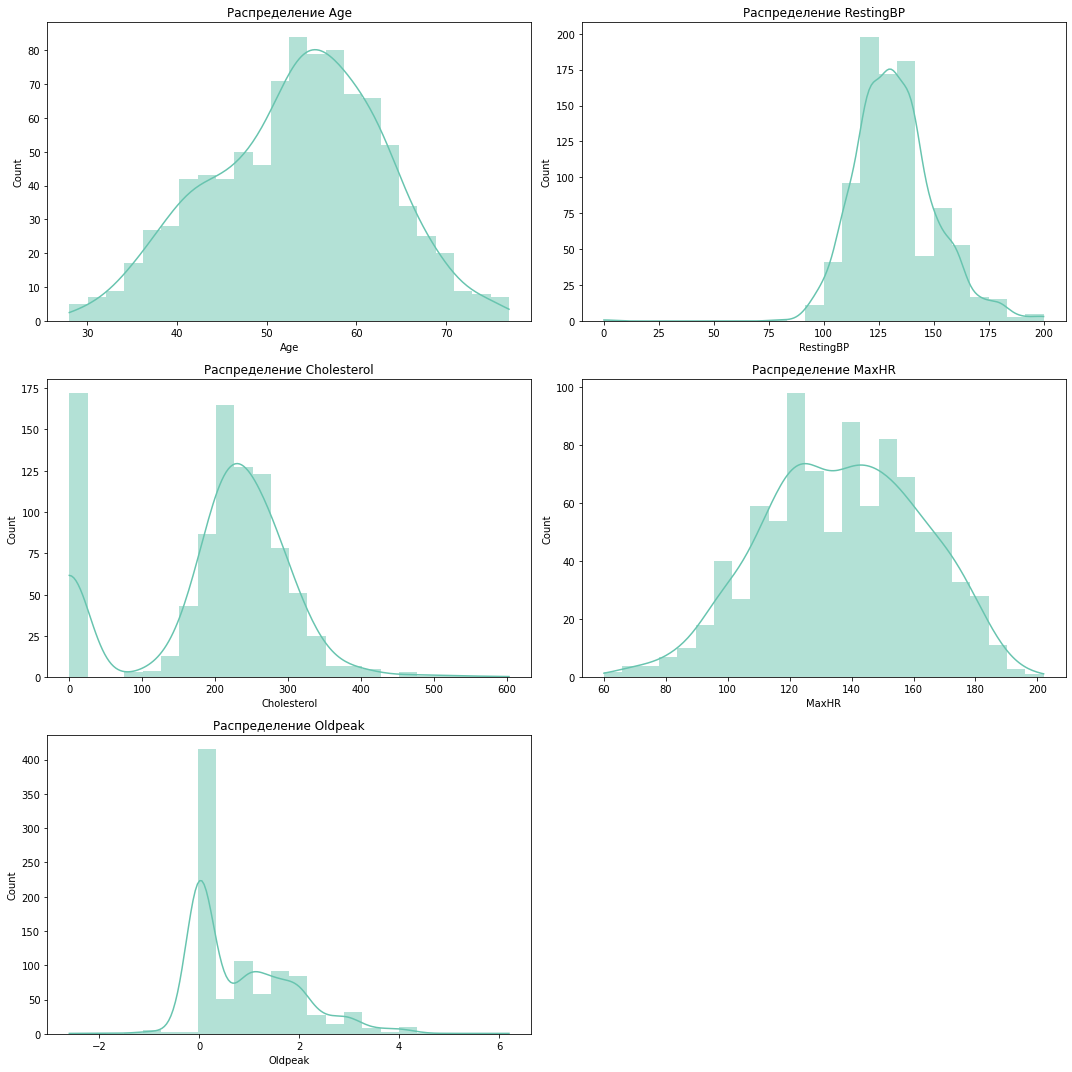

In [12]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(x=feature, data=data, bins=24, kde=True, color='#68c4af', ax=axes[i], edgecolor=None)
    axes[i].set_title(f'Распределение {feature}')

# Убираем лишние оси
for j in range(len(numerical_features), len(axes)):
    axes[j].remove()

plt.tight_layout()
plt.show()

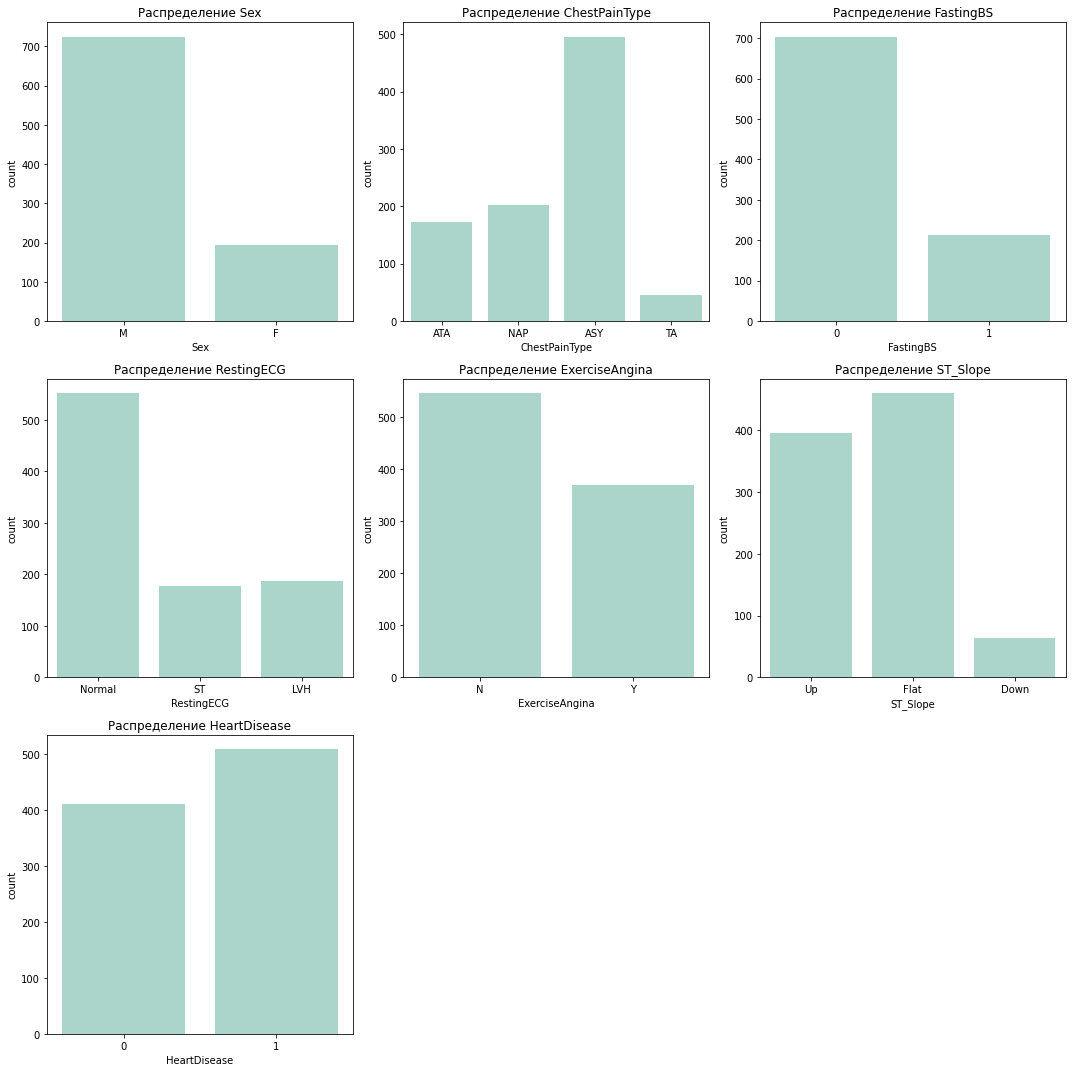

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=data, ax=axes[i], color='#68c4af', alpha=0.6)
    axes[i].set_title(f'Распределение {feature}')

for j in range(len(categorical_features), len(axes)):
    axes[j].remove()

plt.tight_layout()
plt.show()

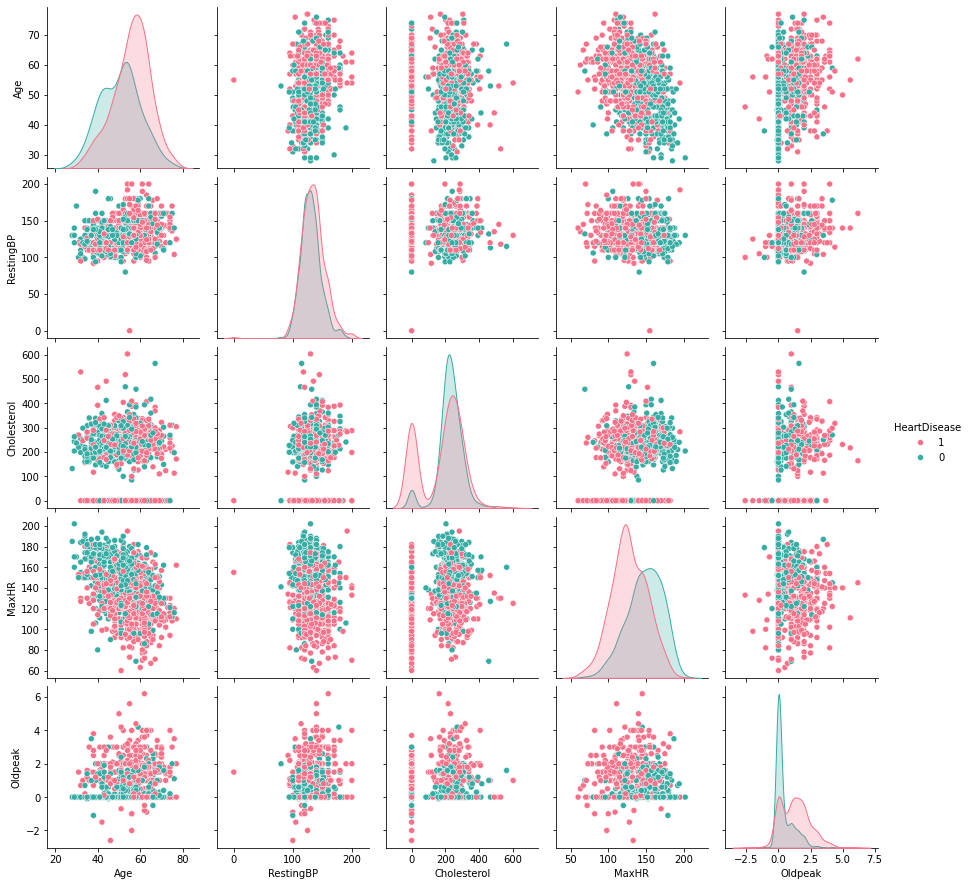

In [14]:
# Диаграммы рассеяния для изучения взаимосвязей между числовыми признаками
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
sns.pairplot(data[numerical_features], hue='HeartDisease', palette='husl', hue_order=[1, 0])
plt.show()

Чем старше человек, тем выше вероятность получить сердечно-сосудистое заболевание.

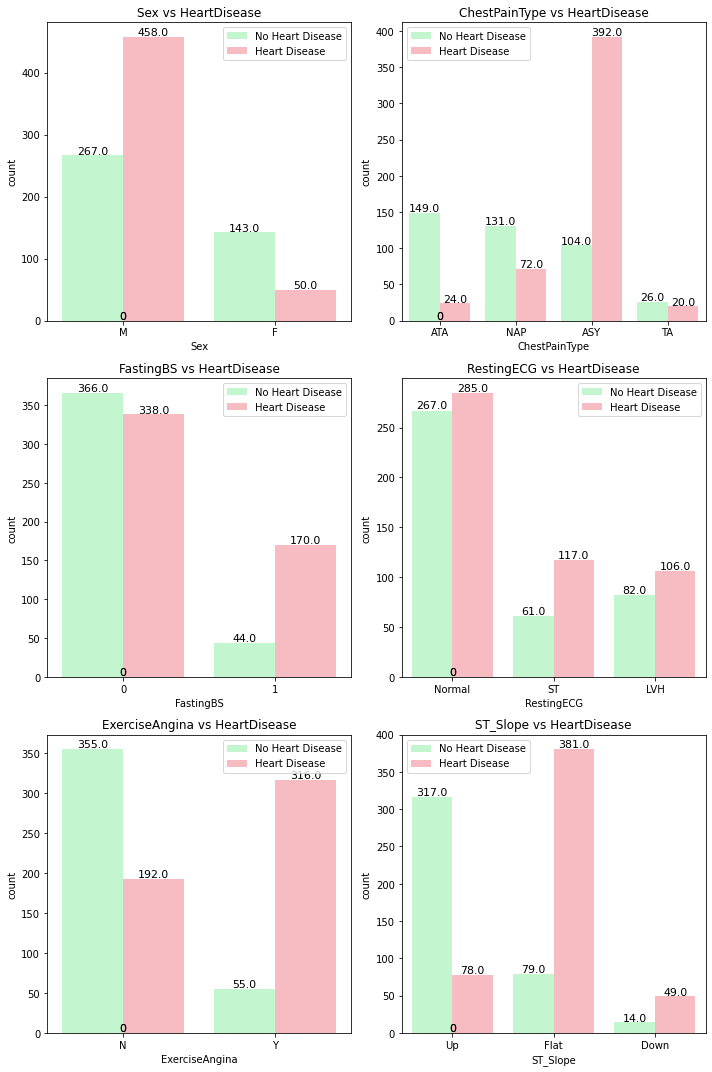

In [15]:
colors = ["#baffc9", "#ffb3ba"]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
ax = ax.flatten()

# Перебираем категориальные признаки и строим графики
for i in range(len(categorical_features) - 1): 
    sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, ax=ax[i])
    for rect in ax[i].patches:
        ax[i].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    title = f'{categorical_features[i]} vs HeartDisease'
    ax[i].legend(['No Heart Disease', 'Heart Disease'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

* Среди мужского населения больше пациентов с сердечно-сосудистыми заболеваниями, чем среди тех, у кого нет сердечно-сосудистых заболеваний. 
* В случае женского населения пациентов с сердечными заболеваниями меньше, чем пациентов без сердечных заболеваний.
* Тип боли в груди ASY указывает на большую вероятность сердечных заболеваний.
* Пациенты с диагнозом Fasting Blood Sugar имеют значительное количество пациентов с сердечными заболеваниями.
* (RestingECG) ЭКГ покоя не имеет четкой категории, выделяющей пациентов с сердечными заболеваниями, кроме ST. Он имеет 2:1 пациентов с сердечно-сосудистыми заболеваниями
* Exercise Induced Engina (Индуцированная упражнениями двигательная активность) определенно повышает вероятность диагностирования сердечных заболеваний.
* ST_Slope: плоский наклон (flat) показывает очень высокую вероятность диагностирования сердечных заболеваний. Вниз также показывает тот же результат, но в очень небольшом количестве данных.

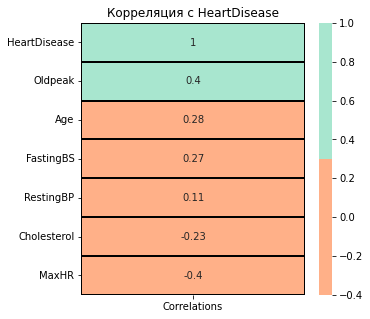

In [16]:
colors = ['#ffb088','#a8e6cf']

corr = data.corrwith(data['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Корреляция с HeartDisease');

In [17]:
mms = MinMaxScaler()
ss = StandardScaler()

df1 = data.copy()
df1['Sex'] = df1['Sex'].map({'M': 1, 'F': 0})
df1['ChestPainType'] = df1['ChestPainType'].map({'ASY': 3, 'NAP': 2, 'ATA': 1, 'TA': 0})
df1['RestingECG'] = df1['RestingECG'].map({'Normal': 2, 'ST': 1, 'LVH': 0})
df1['ExerciseAngina'] = df1['ExerciseAngina'].map({'Y': 1, 'N': 0})
df1['ST_Slope'] = df1['ST_Slope'].map({'Flat': 2, 'Up': 1, 'Down': 0})
df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])

df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])

df1.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,2,1.382928,0,0.295455,1,0
1,-0.478484,0,2,1.491752,-0.171961,0,2,0.754157,0,0.409091,2,1
2,-1.751359,1,1,-0.129513,0.770188,0,1,-1.525138,0,0.295455,1,0


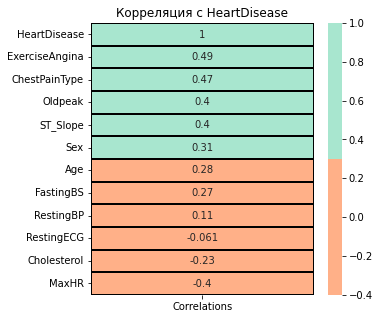

In [18]:
colors = ['#ffb088','#a8e6cf']

corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Корреляция с HeartDisease');

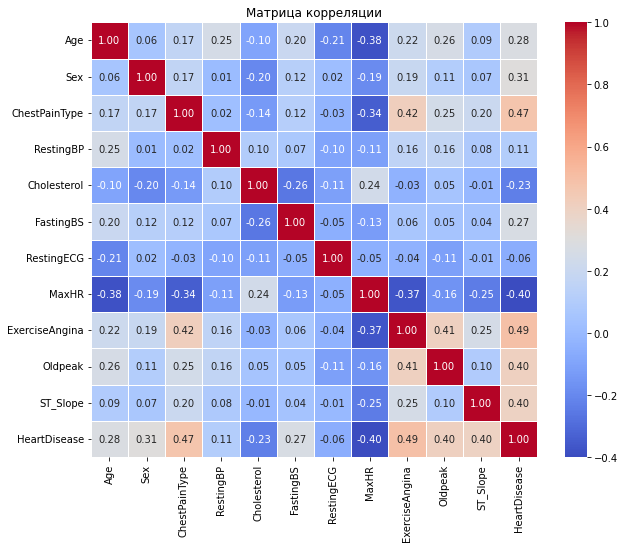

In [19]:
corr_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

In [20]:
X = df1.drop('HeartDisease', axis=1)
y = df1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
print("Метрики Логистической регрессии:")
print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1 Score:", log_reg_f1)

Метрики Логистической регрессии:
Accuracy: 0.842391304347826
Precision: 0.90625
Recall: 0.8130841121495327
F1 Score: 0.8571428571428572


In [21]:
# k-ближайших соседей (k-NN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
print("Метрики к-ближащих соседей:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

Метрики к-ближащих соседей:
Accuracy: 0.8315217391304348
Precision: 0.8725490196078431
Recall: 0.8317757009345794
F1 Score: 0.8516746411483254


In [22]:
# Дерево решений
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred)
decision_tree_recall = recall_score(y_test, decision_tree_pred)
decision_tree_f1 = f1_score(y_test, decision_tree_pred)
print("Метрики дерева решений:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)

Метрики дерева решений:
Accuracy: 0.8206521739130435
Precision: 0.8775510204081632
Recall: 0.8037383177570093
F1 Score: 0.8390243902439024


In [23]:
# Случайный лес
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred)
random_forest_recall = recall_score(y_test, random_forest_pred)
random_forest_f1 = f1_score(y_test, random_forest_pred)
print("\nМетрики Случайных лесов:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)


Метрики Случайных лесов:
Accuracy: 0.8967391304347826
Precision: 0.9150943396226415
Recall: 0.9065420560747663
F1 Score: 0.9107981220657277


In [24]:
# Градиентный бустинг
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting.predict(X_test)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)
gradient_boosting_precision = precision_score(y_test, gradient_boosting_pred)
gradient_boosting_recall = recall_score(y_test, gradient_boosting_pred)
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_pred)
print("Метрики градиентного спуска:")
print("Accuracy:", gradient_boosting_accuracy)
print("Precision:", gradient_boosting_precision)
print("Recall:", gradient_boosting_recall)
print("F1 Score:", gradient_boosting_f1)

Метрики градиентного спуска:
Accuracy: 0.8804347826086957
Precision: 0.912621359223301
Recall: 0.8785046728971962
F1 Score: 0.8952380952380954


In [25]:
# Метод опорных векторов (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print("\nМетрики опорных векторов:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)


Метрики опорных векторов:
Accuracy: 0.8695652173913043
Precision: 0.8878504672897196
Recall: 0.8878504672897196
F1 Score: 0.8878504672897196


In [26]:
# Наивный Байесовский классификатор
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
naive_bayes_precision = precision_score(y_test, naive_bayes_pred)
naive_bayes_recall = recall_score(y_test, naive_bayes_pred)
naive_bayes_f1 = f1_score(y_test, naive_bayes_pred)
print("\nМетрики наивного байесовского классификатора:")
print("Accuracy:", naive_bayes_accuracy)
print("Precision:", naive_bayes_precision)
print("Recall:", naive_bayes_recall)
print("F1 Score:", naive_bayes_f1)


Метрики наивного байесовского классификатора:
Accuracy: 0.8315217391304348
Precision: 0.8877551020408163
Recall: 0.8130841121495327
F1 Score: 0.848780487804878


In [27]:
# Список моделей
models = {
    'Logistic Regression': LogisticRegression(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Гиперпараметры
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
    'k-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    'Decision Tree': {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},
    'Naive Bayes': {}
}

# Поиск оптимальных гиперпараметров для каждой модели
for name, model in models.items():
    if name != 'Naive Bayes':  
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='recall')
        grid_search.fit(X_train, y_train)
        print(f"Лучшие параметры для {name}: {grid_search.best_params_}")

Лучшие параметры для Logistic Regression: {'C': 0.001, 'penalty': 'l2'}
Лучшие параметры для k-Nearest Neighbors: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Лучшие параметры для Decision Tree: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Лучшие параметры для Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Лучшие параметры для Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Лучшие параметры для Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [28]:
# Модели с лучшими параметрами
best_models = {
    'Logistic Regression': LogisticRegression(C=0.001, penalty='l2'),
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3, p=2, weights='uniform'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=2),
    'Random Forest': RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=300),
    'Support Vector Machine': SVC(C=10, gamma='scale', kernel='rbf'),
    'Naive Bayes': GaussianNB()
}

metrics = []

for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    metrics.append([name, accuracy, precision, recall, f1])

metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
metrics_df.sort_values(by='Recall', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.880,0.905,0.888,0.896
0,Logistic Regression,0.772,0.764,0.879,0.817
5,Support Vector Machine,0.864,0.887,0.879,0.883
4,Gradient Boosting,0.859,0.893,0.860,0.876
2,Decision Tree,0.848,0.883,0.850,0.867
1,k-Nearest Neighbors,0.826,0.871,0.822,0.846
6,Naive Bayes,0.832,0.888,0.813,0.849


* Accuracy (Точность): Измеряет общую правильность классификации. (true на все)
* Precision (Точность): Эта метрика измеряет долю истинно положительных предсказаний среди всех положительных предсказаний. Используется, когда ложные положительные предсказания являются дорогостоящими.  
* Recall (Полнота): Эта метрика измеряет долю истинно положительных предсказаний среди всех истинных положительных случаев. Полезно в случаях, когда важно минимизировать ложные отрицательные предсказания.  
* F1 Score: Это гармоническое среднее между Precision и Recall. Эта метрика полезна, когда есть необходимость найти баланс между Precision и Recall.  

Как мы видим, самая оптимальная модель для данного датасета это случайные леса с заданными гиперпараметрами. Она же также имеет лучшие показатели метрики среди всех моделей. Для этой модели критически важна метрика Recall, поскольку нам важно минимизировать ложно отрицательные значения

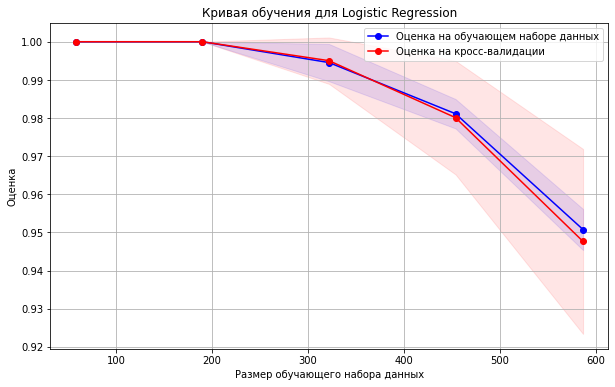

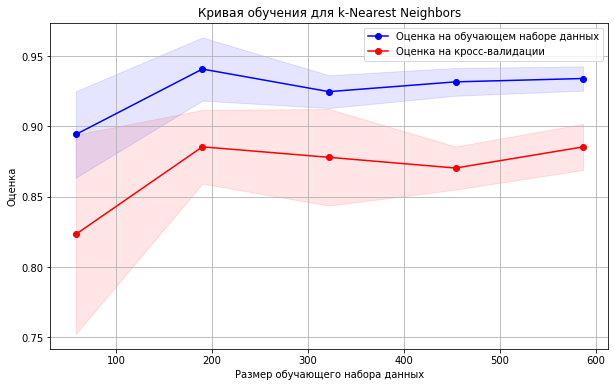

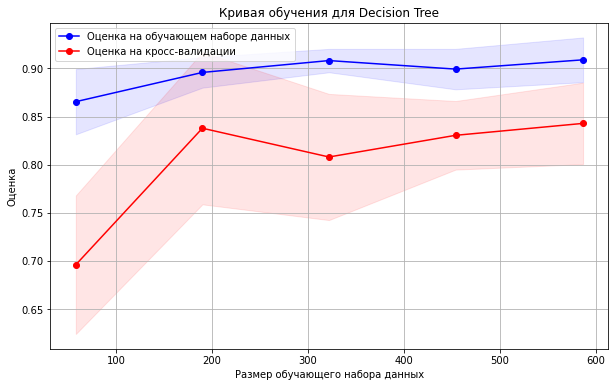

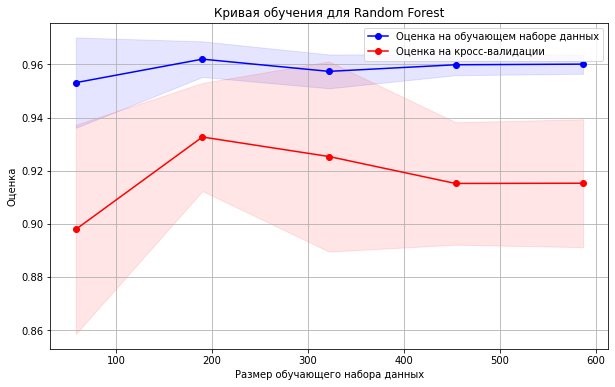

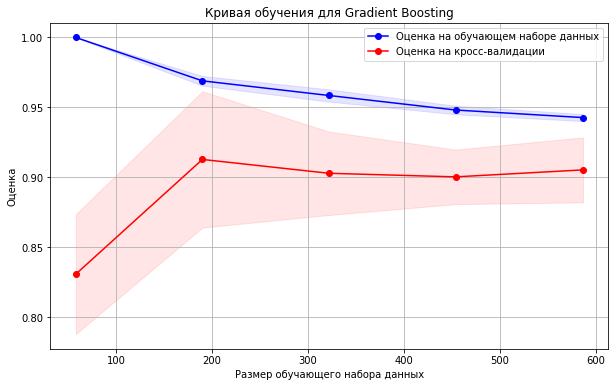

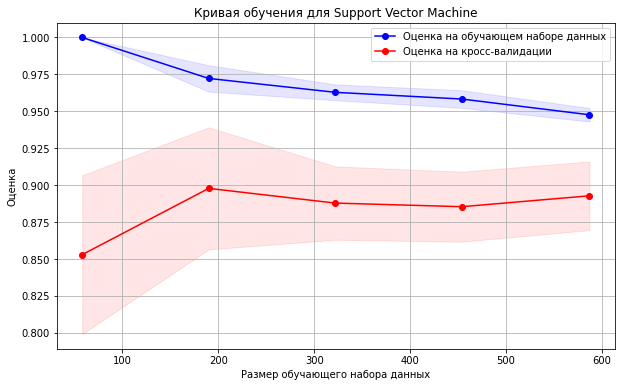

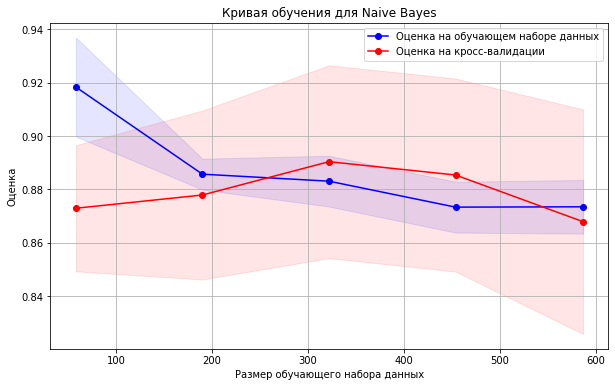

In [29]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, model_name):
    # Вычисляем кривые обучения
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1)
    
    # Средние значения и стандартные отклонения для оценок точности на тренировочном и тестовом наборах данных
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # График
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Оценка на обучающем наборе данных')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Оценка на кросс-валидации')
    plt.xlabel('Размер обучающего набора данных')
    plt.ylabel('Оценка')
    plt.title('Кривая обучения для ' + model_name)
    plt.legend(loc='best')
    plt.grid()
    plt.show()

for name, model in best_models.items():
    model.fit(X_train, y_train)
    # Строим график обучения и валидации
    plot_learning_curve(model, X_train, y_train, X_test, y_test, name)


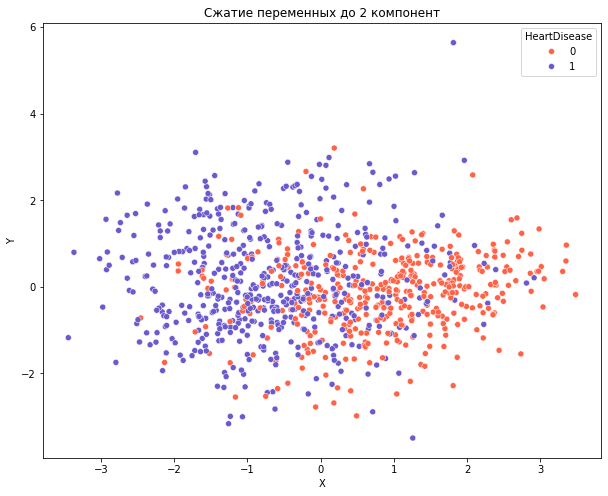

In [31]:
# Использование PCA для сжатия данных до 2 переменных
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Создание нового DataFrame с сжатыми переменными
pca_df = pd.DataFrame(data=X_pca, columns=['X', 'Y'])
pca_df['HeartDisease'] = y.values

plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='HeartDisease', data=pca_df, palette=['#FF6347', '#6A5ACD'])
plt.title('Сжатие переменных до 2 компонент')
plt.show()

Как мы видим, точки распределены равномерно, без явных отдельных кластеров, значит создавать новые модели с учетом условия, что таковые имеются, не нужно